In [879]:
# -*- coding: utf-8 -*-
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import rc
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import cross_val_score
plt.rcParams['axes.unicode_minus'] = False

rc('font', family='AppleGothic')

## Load DataSet

In [880]:
train = pd.read_csv("./Kor_Train_교통사망사고정보(12.1~17.6).csv")
print(train.shape)
train.head()

(25037, 27)


,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017063023,14,야간,금,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,967633,1937456,127.134130,37.435704
1,2017,2017063021,45,야간,금,1,4,2,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,966456,1696405,127.131220,35.262534
2,2017,2017063021,50,야간,금,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,900057,1865697,126.379922,36.784142
3,2017,2017063019,10,야간,금,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,이륜차,이륜차,1095230,1764891,128.554945,35.875973
4,2017,2017063017,2,주간,금,1,2,1,0,0,...,단일로,교량위,이륜차,이륜차,화물차,화물차,947576,1946355,126.906786,37.514993


In [881]:
test = pd.read_csv("./test_kor.csv")
print(test.shape)
test.head()

(50, 16)


,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류
0,야간,금,NaN,NaN,0.0,NaN,0.0,경기,화성시,차대차,측면충돌,중앙선 침범,단일로,기타단일로,승용차,승합차
1,야간,금,NaN,NaN,0.0,NaN,0.0,전남,영암군,차대사람,차도통행중,과속,단일로,기타단일로,승용차,보행자
2,야간,월,1.0,NaN,NaN,0.0,NaN,전남,곡성군,차량단독,전도전복,안전운전 의무 불이행,단일로,기타단일로,자전거,없음
3,야간,일,2.0,NaN,NaN,1.0,NaN,대구,달성군,차대차,측면충돌,중앙선 침범,단일로,기타단일로,승용차,승합차
4,주간,목,1.0,NaN,NaN,NaN,0.0,전남,고흥군,차대차,정면충돌,중앙선 침범,단일로,기타단일로,화물차,화물차


## Explore

### 주야

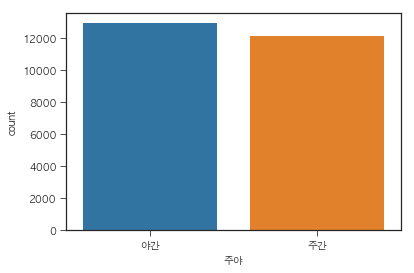

In [882]:
sns.countplot(data=train, x="주야")

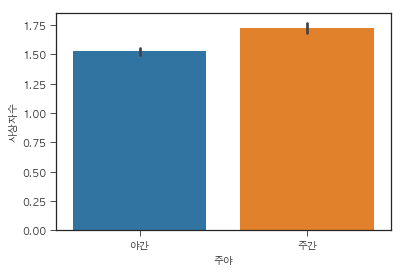

In [883]:
sns.barplot(data=train, x="주야", y="사상자수")

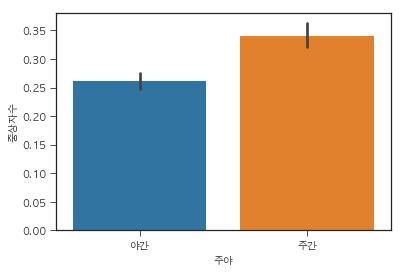

In [884]:
sns.barplot(data=train, x="주야", y="중상자수")

### 요일

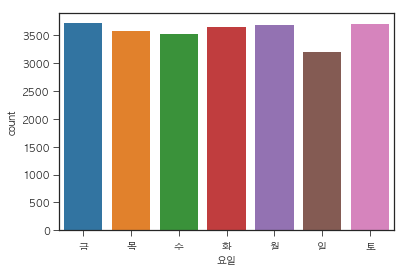

In [885]:
sns.countplot(data=train, x="요일")

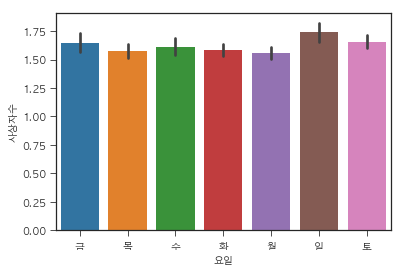

In [886]:
sns.barplot(data=train, x="요일", y="사상자수")

### 사고유형_대분류

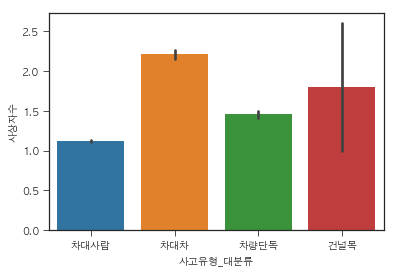

In [887]:
sns.barplot(data=train, x="사고유형_대분류", y="사상자수")

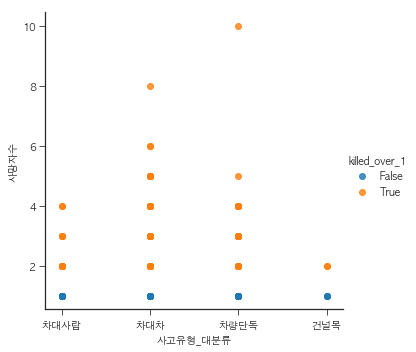

In [888]:
train["killed_over_1"] = train["사망자수"] > 1
sns.lmplot(data=train, x="사고유형_대분류", y="사망자수", hue="killed_over_1", fit_reg=False)

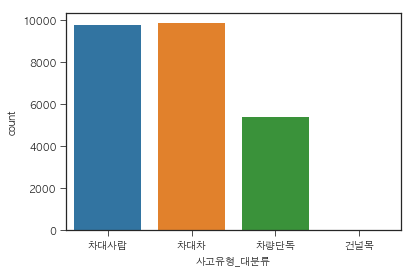

In [889]:
sns.countplot(data=train, x="사고유형_대분류")

In [890]:
train.loc[train["사고유형_대분류"] == "건널목"]

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,killed_over_1
6838,2015,2015102503,52,야간,일,1,1,0,0,0,...,건널목,화물차,소형,열차,열차,1120555,1770049,128.836211,35.919675,False
17114,2013,2013080614,26,주간,화,2,3,1,0,0,...,건널목,승용차,소형,열차,열차,962566,2010834,127.066622,38.088022,True
17728,2013,2013062122,38,야간,금,1,1,0,0,0,...,건널목,이륜차,소형,열차,열차,1156181,1761232,129.229212,35.835173,False
23811,2012,2012040618,17,야간,금,2,3,1,0,0,...,건널목,승용차,소형,열차,열차,950438,1775065,126.950294,35.971076,True
24895,2012,2012011123,22,야간,수,1,1,0,0,0,...,건널목,이륜차,중형,열차,열차,1143022,1688953,129.070827,35.185712,False


### 사고유형_중분류

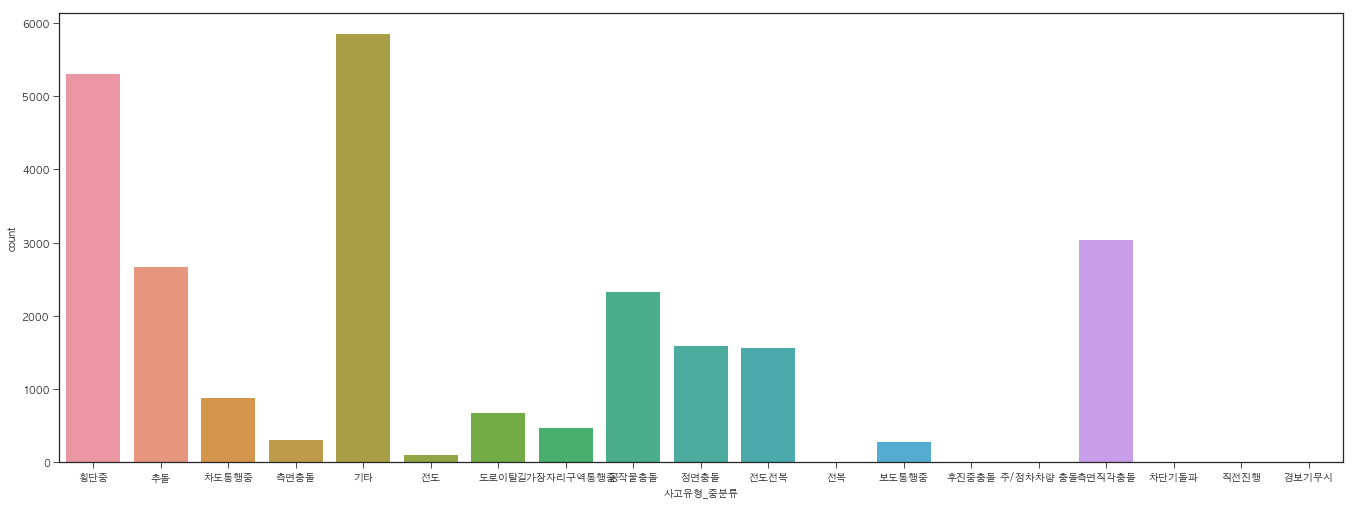

In [891]:

fig, ax = plt.subplots()
fig.set_size_inches(23, 8.27)  
sns.countplot(data=train, x="사고유형_중분류" )

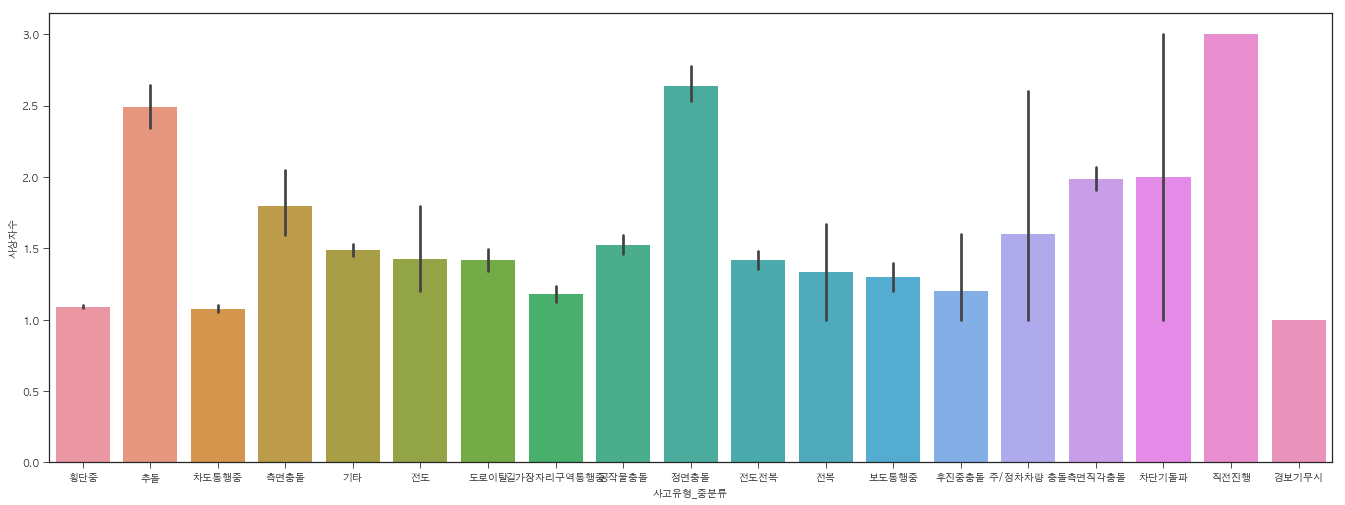

In [892]:
fig, ax = plt.subplots()
fig.set_size_inches(23, 8.27)  
sns.barplot(data=train, x="사고유형_중분류", y="사상자수")

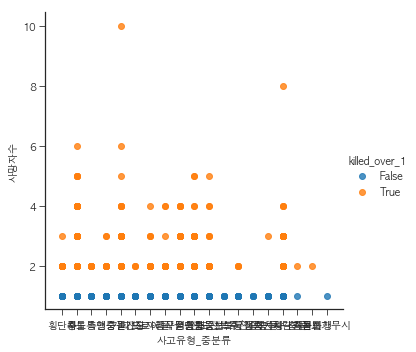

In [893]:
sns.lmplot(data=train, x="사고유형_중분류", y="사망자수", hue="killed_over_1", fit_reg=False)

### 법규위반

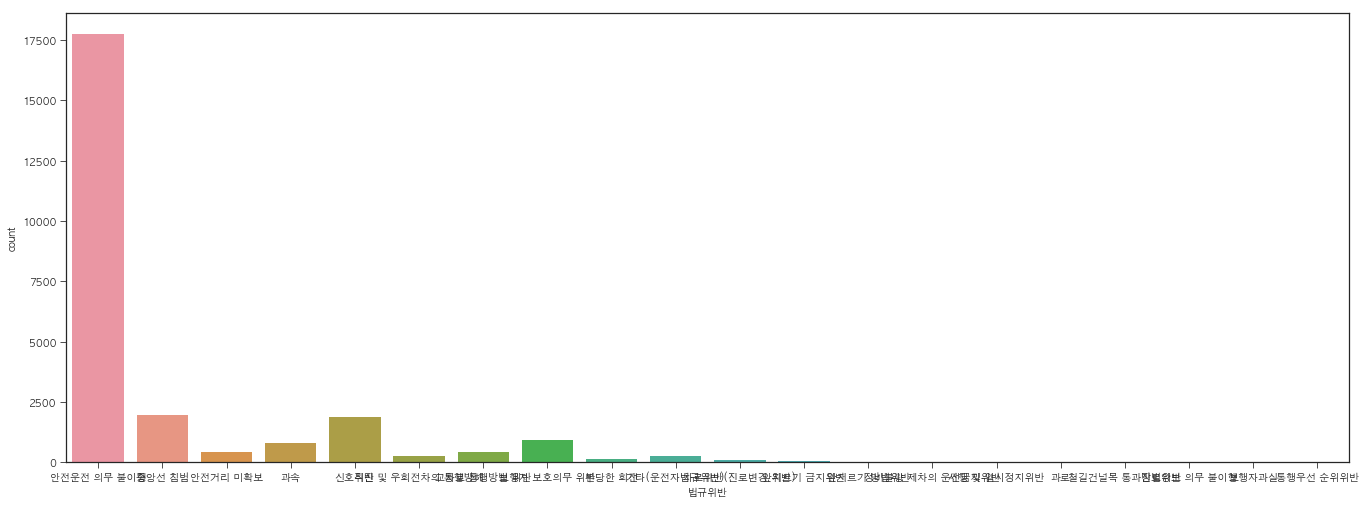

In [894]:
fig, ax = plt.subplots()
fig.set_size_inches(23, 8.27)  
sns.countplot(data=train, x="법규위반")

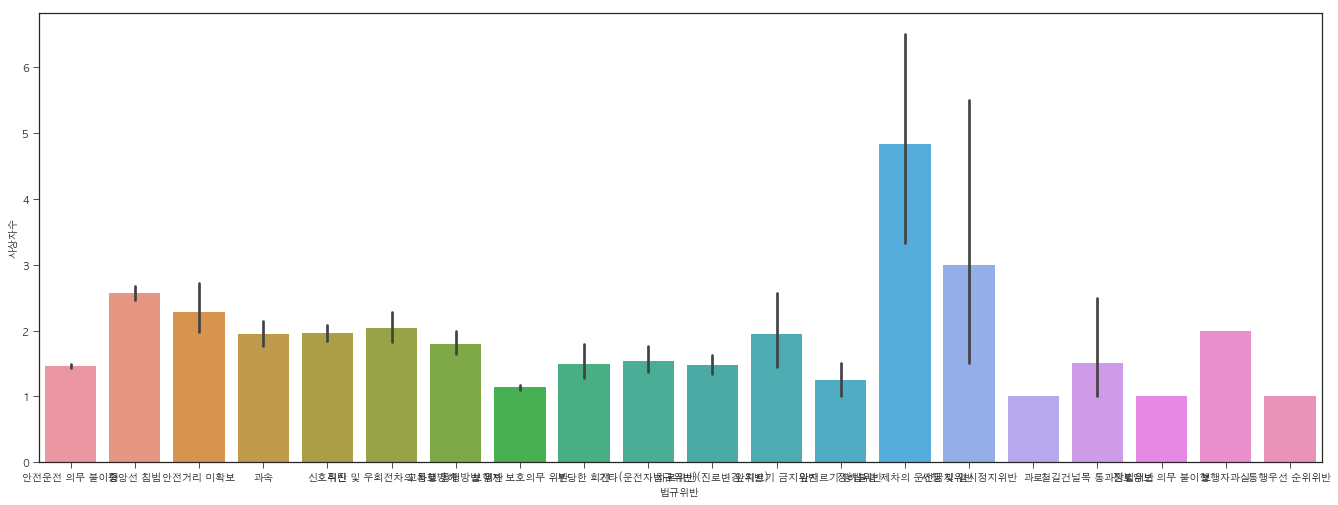

In [895]:
fig, ax = plt.subplots()
fig.set_size_inches(23, 8.27)  
sns.barplot(data=train, x="법규위반", y="사상자수")

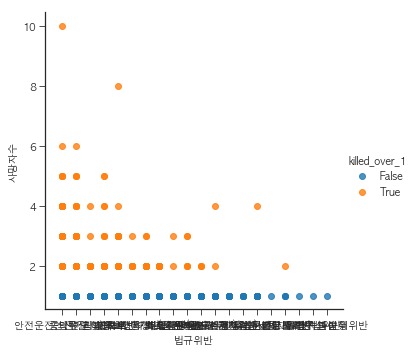

In [896]:
sns.lmplot(data=train, x="법규위반",  y="사망자수", hue="killed_over_1", fit_reg=False)

### 도로형태

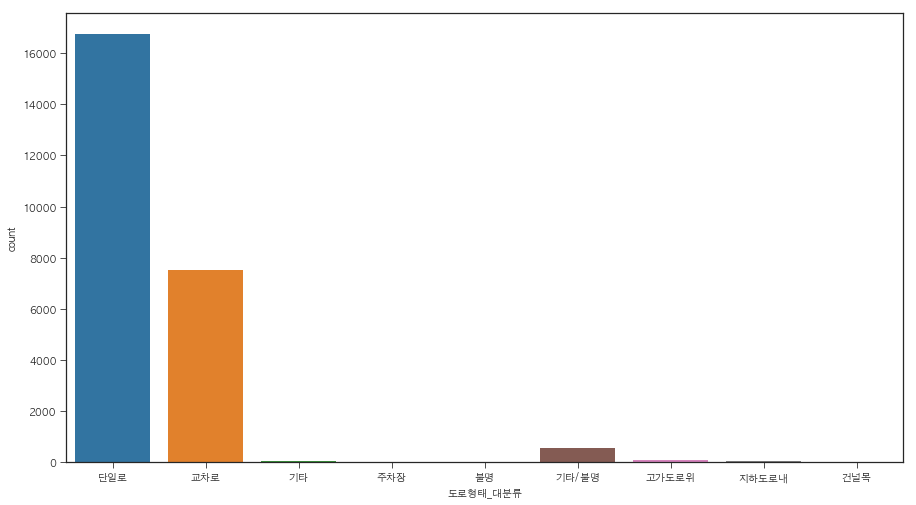

In [897]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)  
sns.countplot(data=train, x="도로형태_대분류")

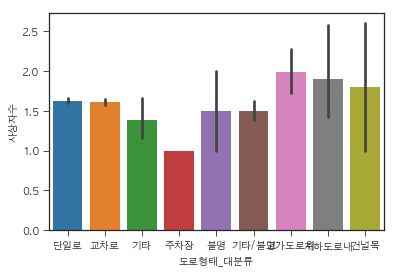

In [898]:
sns.barplot(data=train, x="도로형태_대분류", y="사상자수")

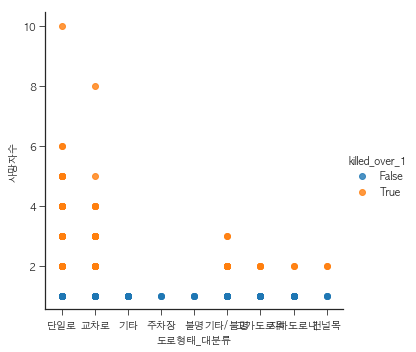

In [899]:
sns.lmplot(data=train, x="도로형태_대분류",  y="사망자수", hue="killed_over_1", fit_reg=False)

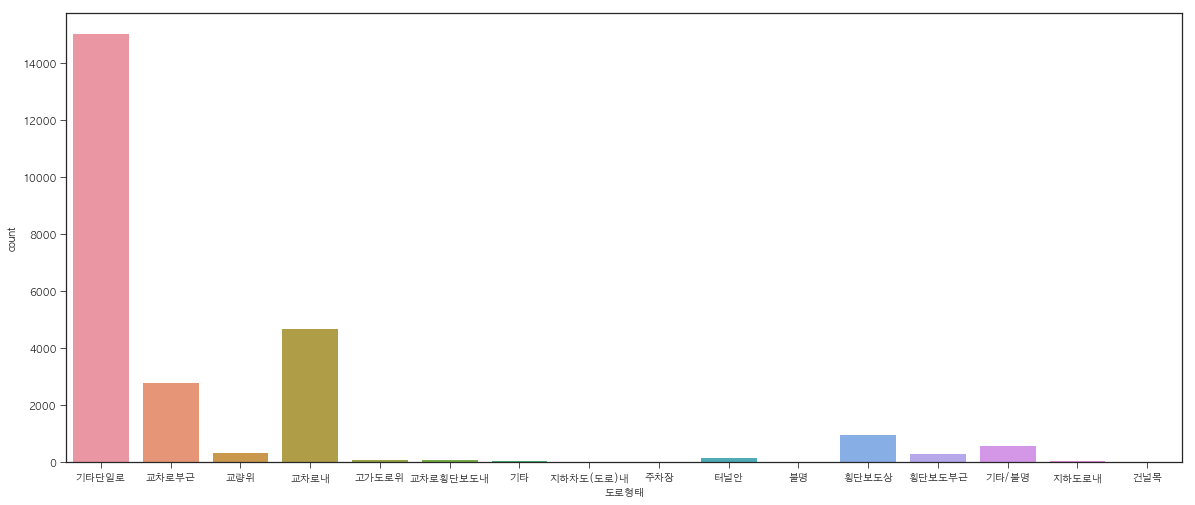

In [900]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)  
sns.countplot(data=train, x="도로형태")

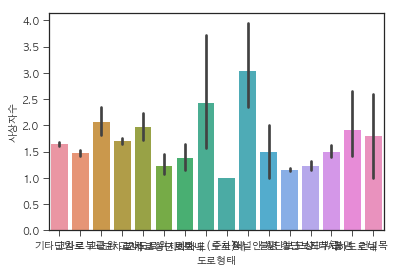

In [901]:
sns.barplot(data=train, x="도로형태", y="사상자수")

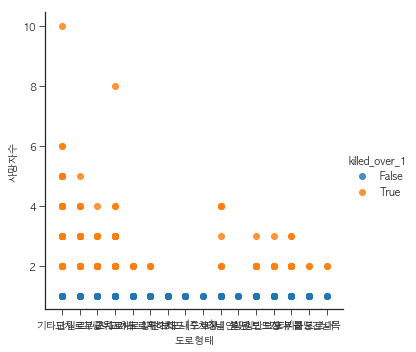

In [902]:
sns.lmplot(data=train, x="도로형태",  y="사망자수", hue="killed_over_1", fit_reg=False)

## 발생위치

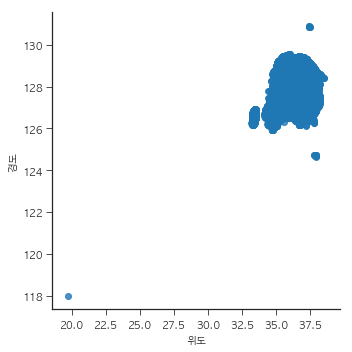

In [903]:
sns.lmplot(data=train, x="위도", y="경도", fit_reg=False)

In [904]:
data_removeOutlier = train.loc[train["위도"] > 20]

/Users/PJS/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


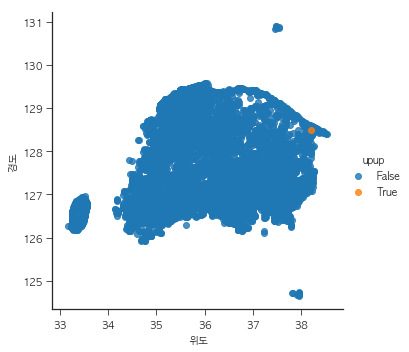

In [905]:
data_removeOutlier["upup"] = data_removeOutlier["사상자수"] > 90
sns.lmplot(data=data_removeOutlier, x="위도", y="경도", hue="upup", fit_reg=False)

In [906]:
train.loc[train["경도"] < 125]

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,killed_over_1
1972,2016,2016122220,55,야간,목,1,1,0,0,0,...,기타단일로,승용차,경형,보행자,보행자,0,0,117.992603,19.694477,False
2203,2016,2016120310,50,주간,토,1,1,0,0,0,...,기타단일로,불명,불명,없음,없음,755186,1984097,124.718517,37.823807,False
3038,2016,2016100123,30,야간,토,1,1,0,0,0,...,기타단일로,승용차,중형,보행자,보행자,756184,2000094,124.724437,37.968087,False
3548,2016,2016081902,25,야간,금,1,4,3,0,0,...,기타단일로,승용차,중형,없음,없음,754452,1985513,124.709706,37.836357,False
4525,2016,2016051714,5,주간,화,1,1,0,0,0,...,기타단일로,화물차,소형,농기계,농기계,752398,1997371,124.682322,37.942550,False
7941,2015,2015080309,55,주간,월,1,1,0,0,0,...,교차로내,승용차,중형,보행자,보행자,750342,1995365,124.659647,37.923929,False
17002,2013,2013081422,15,야간,수,1,1,0,0,0,...,기타/불명,화물차,소형,보행자,보행자,756245,2000071,124.733259,37.954716,False
20278,2012,2012120117,0,주간,토,1,1,0,0,0,...,기타단일로,화물차,소형,없음,없음,749673,2000195,124.650131,37.967075,False
21032,2012,2012101623,17,야간,화,1,3,1,1,0,...,기타단일로,승용차,중형,승용차,중형,750468,1999037,124.659806,37.957019,False
22401,2012,2012071315,10,주간,금,1,2,0,1,0,...,기타단일로,화물차,소형,승용차,중형,755096,2000166,124.712040,37.968442,False


In [907]:
train.loc[train["경도"] > 130]

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,killed_over_1
2969,2016,2016100620,11,야간,목,1,1,0,0,0,...,교차로부근,이륜차,사발이,없음,없음,1296967,1953740,130.860809,37.535188,False
13401,2014,2014052007,0,주간,화,1,1,0,0,0,...,기타단일로,이륜차,사발이,없음,없음,1298055,1954209,130.872144,37.541171,False
13493,2014,2014051314,43,주간,화,1,1,0,0,0,...,교차로부근,농기계,농기계,없음,없음,1295333,1946260,130.837930,37.470410,False
18325,2013,2013050906,15,주간,목,2,2,0,0,0,...,기타단일로,이륜차,사발이,없음,없음,1296237,1947378,130.849999,37.478176,True
22755,2012,2012061805,45,야간,월,1,1,0,0,0,...,기타단일로,화물차,소형,없음,없음,1300050,1947398,130.897725,37.479326,False
23566,2012,2012042302,0,야간,월,1,5,0,3,1,...,기타단일로,승용차,중형,없음,없음,1301128,1947627,130.905322,37.478836,False


## Preprocess

### 주야

In [908]:
train["주간"] = train["주야"] == "주간"
train["야간"] = train["주야"] == "야간"
print(train.shape)
train.head()

(25037, 30)


,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,killed_over_1,주간,야간
0,2017,2017063023,14,야간,금,1,1,0,0,0,...,승용차,보행자,보행자,967633,1937456,127.134130,37.435704,False,False,True
1,2017,2017063021,45,야간,금,1,4,2,1,0,...,승용차,승용차,승용차,966456,1696405,127.131220,35.262534,False,False,True
2,2017,2017063021,50,야간,금,1,1,0,0,0,...,승용차,보행자,보행자,900057,1865697,126.379922,36.784142,False,False,True
3,2017,2017063019,10,야간,금,1,1,0,0,0,...,승용차,이륜차,이륜차,1095230,1764891,128.554945,35.875973,False,False,True
4,2017,2017063017,2,주간,금,1,2,1,0,0,...,이륜차,화물차,화물차,947576,1946355,126.906786,37.514993,False,True,False


In [909]:
test["주간"] = test["주야"] == "주간"
test["야간"] = test["주야"] == "야간"
print(test.shape)
test.head()

(50, 18)


,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,주간,야간
0,야간,금,NaN,NaN,0.0,NaN,0.0,경기,화성시,차대차,측면충돌,중앙선 침범,단일로,기타단일로,승용차,승합차,False,True
1,야간,금,NaN,NaN,0.0,NaN,0.0,전남,영암군,차대사람,차도통행중,과속,단일로,기타단일로,승용차,보행자,False,True
2,야간,월,1.0,NaN,NaN,0.0,NaN,전남,곡성군,차량단독,전도전복,안전운전 의무 불이행,단일로,기타단일로,자전거,없음,False,True
3,야간,일,2.0,NaN,NaN,1.0,NaN,대구,달성군,차대차,측면충돌,중앙선 침범,단일로,기타단일로,승용차,승합차,False,True
4,주간,목,1.0,NaN,NaN,NaN,0.0,전남,고흥군,차대차,정면충돌,중앙선 침범,단일로,기타단일로,화물차,화물차,True,False


### 요일

In [910]:
train["day"] = train["요일"]
print(train.shape)
train.head()

(25037, 31)


,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,killed_over_1,주간,야간,day
0,2017,2017063023,14,야간,금,1,1,0,0,0,...,보행자,보행자,967633,1937456,127.134130,37.435704,False,False,True,금
1,2017,2017063021,45,야간,금,1,4,2,1,0,...,승용차,승용차,966456,1696405,127.131220,35.262534,False,False,True,금
2,2017,2017063021,50,야간,금,1,1,0,0,0,...,보행자,보행자,900057,1865697,126.379922,36.784142,False,False,True,금
3,2017,2017063019,10,야간,금,1,1,0,0,0,...,이륜차,이륜차,1095230,1764891,128.554945,35.875973,False,False,True,금
4,2017,2017063017,2,주간,금,1,2,1,0,0,...,화물차,화물차,947576,1946355,126.906786,37.514993,False,True,False,금


In [911]:
test["day"] = test["요일"]
print(test.shape)
test.head()

(50, 19)


,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,주간,야간,day
0,야간,금,NaN,NaN,0.0,NaN,0.0,경기,화성시,차대차,측면충돌,중앙선 침범,단일로,기타단일로,승용차,승합차,False,True,금
1,야간,금,NaN,NaN,0.0,NaN,0.0,전남,영암군,차대사람,차도통행중,과속,단일로,기타단일로,승용차,보행자,False,True,금
2,야간,월,1.0,NaN,NaN,0.0,NaN,전남,곡성군,차량단독,전도전복,안전운전 의무 불이행,단일로,기타단일로,자전거,없음,False,True,월
3,야간,일,2.0,NaN,NaN,1.0,NaN,대구,달성군,차대차,측면충돌,중앙선 침범,단일로,기타단일로,승용차,승합차,False,True,일
4,주간,목,1.0,NaN,NaN,NaN,0.0,전남,고흥군,차대차,정면충돌,중앙선 침범,단일로,기타단일로,화물차,화물차,True,False,목


In [912]:
train["mon"] = train["day"] == "월"
train["tue"] = train["day"] == "화"
train["wed"] = train["day"] == "수"
train["thu"] = train["day"] == "목"
train["fri"] = train["day"] == "금"
train["sat"] = train["day"] == "토"
train["sun"] = train["day"] == "일"
print(train.shape)
train.head()

(25037, 38)


,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,주간,야간,day,mon,tue,wed,thu,fri,sat,sun
0,2017,2017063023,14,야간,금,1,1,0,0,0,...,False,True,금,False,False,False,False,True,False,False
1,2017,2017063021,45,야간,금,1,4,2,1,0,...,False,True,금,False,False,False,False,True,False,False
2,2017,2017063021,50,야간,금,1,1,0,0,0,...,False,True,금,False,False,False,False,True,False,False
3,2017,2017063019,10,야간,금,1,1,0,0,0,...,False,True,금,False,False,False,False,True,False,False
4,2017,2017063017,2,주간,금,1,2,1,0,0,...,True,False,금,False,False,False,False,True,False,False


In [913]:
test["mon"] = test["day"] == "월"
test["tue"] = test["day"] == "화"
test["wed"] = test["day"] == "수"
test["thu"] = test["day"] == "목"
test["fri"] = test["day"] == "금"
test["sat"] = test["day"] == "토"
test["sun"] = test["day"] == "일"
print(train.shape)
train.head()

(25037, 38)


,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,주간,야간,day,mon,tue,wed,thu,fri,sat,sun
0,2017,2017063023,14,야간,금,1,1,0,0,0,...,False,True,금,False,False,False,False,True,False,False
1,2017,2017063021,45,야간,금,1,4,2,1,0,...,False,True,금,False,False,False,False,True,False,False
2,2017,2017063021,50,야간,금,1,1,0,0,0,...,False,True,금,False,False,False,False,True,False,False
3,2017,2017063019,10,야간,금,1,1,0,0,0,...,False,True,금,False,False,False,False,True,False,False
4,2017,2017063017,2,주간,금,1,2,1,0,0,...,True,False,금,False,False,False,False,True,False,False


### 사고유형_대분류

In [914]:
train["차대사람"] = train["사고유형_대분류"] == "차대사람"
train["차대차"] = train["사고유형_대분류"] == "차대차"
train["차량단독"] = train["사고유형_대분류"] == "차량단독"
train["건널목"] = train["사고유형_대분류"] == "건널목"
print(train.shape)
train.head()

(25037, 42)


,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,tue,wed,thu,fri,sat,sun,차대사람,차대차,차량단독,건널목
0,2017,2017063023,14,야간,금,1,1,0,0,0,...,False,False,False,True,False,False,True,False,False,False
1,2017,2017063021,45,야간,금,1,4,2,1,0,...,False,False,False,True,False,False,False,True,False,False
2,2017,2017063021,50,야간,금,1,1,0,0,0,...,False,False,False,True,False,False,True,False,False,False
3,2017,2017063019,10,야간,금,1,1,0,0,0,...,False,False,False,True,False,False,False,True,False,False
4,2017,2017063017,2,주간,금,1,2,1,0,0,...,False,False,False,True,False,False,False,True,False,False


In [915]:
test["차대사람"] = test["사고유형_대분류"] == "차대사람"
test["차대차"] = test["사고유형_대분류"] == "차대차"
test["차량단독"] = test["사고유형_대분류"] == "차량단독"
test["건널목"] = test["사고유형_대분류"] == "건널목"
print(test.shape)
test.head()

(50, 30)


,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,...,tue,wed,thu,fri,sat,sun,차대사람,차대차,차량단독,건널목
0,야간,금,NaN,NaN,0.0,NaN,0.0,경기,화성시,차대차,...,False,False,False,True,False,False,False,True,False,False
1,야간,금,NaN,NaN,0.0,NaN,0.0,전남,영암군,차대사람,...,False,False,False,True,False,False,True,False,False,False
2,야간,월,1.0,NaN,NaN,0.0,NaN,전남,곡성군,차량단독,...,False,False,False,False,False,False,False,False,True,False
3,야간,일,2.0,NaN,NaN,1.0,NaN,대구,달성군,차대차,...,False,False,False,False,False,True,False,True,False,False
4,주간,목,1.0,NaN,NaN,NaN,0.0,전남,고흥군,차대차,...,False,False,True,False,False,False,False,True,False,False


## Train

In [916]:
feature_names = ["주간", "야간", "mon", "tue", "wed", "thu", "fri", "sat", "sun", "차대사람", "차대차", "차량단독", "건널목"]
feature_names

['주간',
 '야간',
 'mon',
 'tue',
 'wed',
 'thu',
 'fri',
 'sat',
 'sun',
 '차대사람',
 '차대차',
 '차량단독',
 '건널목']

In [917]:
label_name1 = "사망자수"

In [918]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(25037, 13)


,주간,야간,mon,tue,wed,thu,fri,sat,sun,차대사람,차대차,차량단독,건널목
0,False,True,False,False,False,False,True,False,False,True,False,False,False
1,False,True,False,False,False,False,True,False,False,False,True,False,False
2,False,True,False,False,False,False,True,False,False,True,False,False,False
3,False,True,False,False,False,False,True,False,False,False,True,False,False
4,True,False,False,False,False,False,True,False,False,False,True,False,False


In [919]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(50, 13)


,주간,야간,mon,tue,wed,thu,fri,sat,sun,차대사람,차대차,차량단독,건널목
0,False,True,False,False,False,False,True,False,False,False,True,False,False
1,False,True,False,False,False,False,True,False,False,True,False,False,False
2,False,True,True,False,False,False,False,False,False,False,False,True,False
3,False,True,False,False,False,False,False,False,True,False,True,False,False
4,True,False,False,False,False,True,False,False,False,False,True,False,False


In [920]:
y_train = train[label_name1]
print(y_train.shape)
y_train.head()

(25037,)


0    1
1    1
2    1
3    1
4    1
Name: 사망자수, dtype: int64

## Use Random Forest

In [921]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)

## Validation

In [922]:
score = cross_val_score(model, X_train, y_train, cv=20).mean()
f"scores = {score:.5f}"

'scores = 0.00755'

## Fit

In [923]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

## Predict

In [924]:
predictions1 = model.predict(X_test)
print(predictions1.shape)
predictions1

(50,)


array([1.0458532 , 1.0101861 , 1.05100651, 1.09997204, 1.0646433 ,
       1.0646433 , 1.0701738 , 1.04577634, 1.09485002, 1.0066237 ,
       1.05637464, 1.06941202, 1.06941202, 1.06941202, 1.07464837,
       1.07464837, 1.07464837, 1.06941202, 1.07464837, 1.07464837,
       1.08852962, 1.08810485, 1.0130566 , 1.05863397, 1.069092  ,
       1.00342031, 1.06421333, 1.06421333, 1.04139176, 1.05808663,
       1.05808663, 1.06421333, 1.09997204, 1.09485002, 1.05808663,
       1.0701738 , 1.03651302, 1.01174939, 1.04577634, 1.00342031,
       1.05478336, 1.05478336, 1.0558262 , 1.03905755, 1.01015993,
       1.01367157, 1.09873594, 1.05621965, 1.09873594, 1.07633243])

## Submit

In [925]:
test["result_사망자수"] = predictions1

## ---------------

In [926]:
# Train
label_name2 = "부상신고자수"
y_train = train[label_name2]

In [927]:
# Validation
score = cross_val_score(model, X_train, y_train, cv=20).mean()

In [928]:
# Fit
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [929]:
# predict
predictions2 = model.predict(X_test)
print(predictions2.shape)
predictions2

(50,)


array([0.04578429, 0.00784265, 0.02223602, 0.0725147 , 0.04697802,
       0.04697802, 0.10175726, 0.04113905, 0.05145362, 0.0054594 ,
       0.0054594 , 0.00273876, 0.00273876, 0.00273876, 0.00459484,
       0.00459484, 0.00459484, 0.00273876, 0.00459484, 0.00459484,
       0.05137794, 0.07361441, 0.00459484, 0.09342128, 0.02771518,
       0.00114334, 0.01873882, 0.01873882, 0.01923116, 0.04035266,
       0.04035266, 0.01873882, 0.0725147 , 0.05145362, 0.04035266,
       0.10175726, 0.01497272, 0.004821  , 0.04113905, 0.00114334,
       0.00538097, 0.00538097, 0.0419116 , 0.013386  , 0.00339466,
       0.01115301, 0.06248202, 0.09398071, 0.06248202, 0.07020717])

In [930]:
test["result_부상신고자수"] = predictions2
test.head(50)

,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,...,thu,fri,sat,sun,차대사람,차대차,차량단독,건널목,result_사망자수,result_부상신고자수
0,야간,금,NaN,NaN,0.0,NaN,0.0,경기,화성시,차대차,...,False,True,False,False,False,True,False,False,1.045853,0.045784
1,야간,금,NaN,NaN,0.0,NaN,0.0,전남,영암군,차대사람,...,False,True,False,False,True,False,False,False,1.010186,0.007843
2,야간,월,1.0,NaN,NaN,0.0,NaN,전남,곡성군,차량단독,...,False,False,False,False,False,False,True,False,1.051007,0.022236
3,야간,일,2.0,NaN,NaN,1.0,NaN,대구,달성군,차대차,...,False,False,False,True,False,True,False,False,1.099972,0.072515
4,주간,목,1.0,NaN,NaN,NaN,0.0,전남,고흥군,차대차,...,True,False,False,False,False,True,False,False,1.064643,0.046978
5,주간,목,2.0,NaN,NaN,NaN,0.0,경북,영천시,차대차,...,True,False,False,False,False,True,False,False,1.064643,0.046978
6,야간,수,1.0,NaN,NaN,NaN,0.0,충남,아산시,차대차,...,False,False,False,False,False,True,False,False,1.070174,0.101757
7,주간,월,NaN,NaN,NaN,5.0,0.0,충남,서천군,차대차,...,False,False,False,False,False,True,False,False,1.045776,0.041139
8,주간,일,NaN,NaN,NaN,21.0,4.0,강원,평창군,차대차,...,False,False,False,True,False,True,False,False,1.094850,0.051454
9,주간,수,NaN,NaN,NaN,0.0,0.0,충북,음성군,차대사람,...,False,False,False,False,True,False,False,False,1.006624,0.005459


In [931]:
# Train
label_name3 = "중상자수"
y_train = train[label_name3]
# Validation
score = cross_val_score(model, X_train, y_train, cv=20).mean()
# Fit
model.fit(X_train, y_train)
# predict
predictions3 = model.predict(X_test)
print(predictions3.shape)
test["result_중상자수"] = predictions3
test.head(50)

(50,)


,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,...,fri,sat,sun,차대사람,차대차,차량단독,건널목,result_사망자수,result_부상신고자수,result_중상자수
0,야간,금,NaN,NaN,0.0,NaN,0.0,경기,화성시,차대차,...,True,False,False,False,True,False,False,1.045853,0.045784,0.554450
1,야간,금,NaN,NaN,0.0,NaN,0.0,전남,영암군,차대사람,...,True,False,False,True,False,False,False,1.010186,0.007843,0.051880
2,야간,월,1.0,NaN,NaN,0.0,NaN,전남,곡성군,차량단독,...,False,False,False,False,False,True,False,1.051007,0.022236,0.223555
3,야간,일,2.0,NaN,NaN,1.0,NaN,대구,달성군,차대차,...,False,False,True,False,True,False,False,1.099972,0.072515,0.738970
4,주간,목,1.0,NaN,NaN,NaN,0.0,전남,고흥군,차대차,...,False,False,False,False,True,False,False,1.064643,0.046978,0.489862
5,주간,목,2.0,NaN,NaN,NaN,0.0,경북,영천시,차대차,...,False,False,False,False,True,False,False,1.064643,0.046978,0.489862
6,야간,수,1.0,NaN,NaN,NaN,0.0,충남,아산시,차대차,...,False,False,False,False,True,False,False,1.070174,0.101757,0.638993
7,주간,월,NaN,NaN,NaN,5.0,0.0,충남,서천군,차대차,...,False,False,False,False,True,False,False,1.045776,0.041139,0.481206
8,주간,일,NaN,NaN,NaN,21.0,4.0,강원,평창군,차대차,...,False,False,True,False,True,False,False,1.094850,0.051454,0.747430
9,주간,수,NaN,NaN,NaN,0.0,0.0,충북,음성군,차대사람,...,False,False,False,True,False,False,False,1.006624,0.005459,0.069310


In [932]:
# Train
label_name4 = "경상자수"
y_train = train[label_name4]
# Validation
score = cross_val_score(model, X_train, y_train, cv=20).mean()
# Fit
model.fit(X_train, y_train)
# predict
predictions4 = model.predict(X_test)
print(predictions4.shape)
test["result_경상자수"] = predictions4
test.head(50)

(50,)


,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,...,sat,sun,차대사람,차대차,차량단독,건널목,result_사망자수,result_부상신고자수,result_중상자수,result_경상자수
0,야간,금,NaN,NaN,0.0,NaN,0.0,경기,화성시,차대차,...,False,False,False,True,False,False,1.045853,0.045784,0.554450,0.480150
1,야간,금,NaN,NaN,0.0,NaN,0.0,전남,영암군,차대사람,...,False,False,True,False,False,False,1.010186,0.007843,0.051880,0.037825
2,야간,월,1.0,NaN,NaN,0.0,NaN,전남,곡성군,차량단독,...,False,False,False,False,True,False,1.051007,0.022236,0.223555,0.076199
3,야간,일,2.0,NaN,NaN,1.0,NaN,대구,달성군,차대차,...,False,True,False,True,False,False,1.099972,0.072515,0.738970,0.510270
4,주간,목,1.0,NaN,NaN,NaN,0.0,전남,고흥군,차대차,...,False,False,False,True,False,False,1.064643,0.046978,0.489862,0.538272
5,주간,목,2.0,NaN,NaN,NaN,0.0,경북,영천시,차대차,...,False,False,False,True,False,False,1.064643,0.046978,0.489862,0.538272
6,야간,수,1.0,NaN,NaN,NaN,0.0,충남,아산시,차대차,...,False,False,False,True,False,False,1.070174,0.101757,0.638993,0.461567
7,주간,월,NaN,NaN,NaN,5.0,0.0,충남,서천군,차대차,...,False,False,False,True,False,False,1.045776,0.041139,0.481206,0.485888
8,주간,일,NaN,NaN,NaN,21.0,4.0,강원,평창군,차대차,...,False,True,False,True,False,False,1.094850,0.051454,0.747430,0.834250
9,주간,수,NaN,NaN,NaN,0.0,0.0,충북,음성군,차대사람,...,False,False,True,False,False,False,1.006624,0.005459,0.069310,0.063544


In [933]:
test.loc[(test["사상자수"].isnull()) & (test["사망자수"].isnull()), "사망자수"] = test["result_사망자수"]
test.loc[(test["사상자수"].isnull()) & (test["부상신고자수"].isnull()), "부상신고자수"] = test["result_부상신고자수"]
test.loc[(test["사상자수"].isnull()) & (test["중상자수"].isnull()), "중상자수"] = test["result_중상자수"]
test.loc[(test["사상자수"].isnull()) & (test["경상자수"].isnull()), "경상자수"] = test["result_경상자수"]

In [934]:
test.head(50)

,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,...,sat,sun,차대사람,차대차,차량단독,건널목,result_사망자수,result_부상신고자수,result_중상자수,result_경상자수
0,야간,금,1.045853,NaN,0.000000,0.480150,0.000000,경기,화성시,차대차,...,False,False,False,True,False,False,1.045853,0.045784,0.554450,0.480150
1,야간,금,1.010186,NaN,0.000000,0.037825,0.000000,전남,영암군,차대사람,...,False,False,True,False,False,False,1.010186,0.007843,0.051880,0.037825
2,야간,월,1.000000,NaN,0.223555,0.000000,0.022236,전남,곡성군,차량단독,...,False,False,False,False,True,False,1.051007,0.022236,0.223555,0.076199
3,야간,일,2.000000,NaN,0.738970,1.000000,0.072515,대구,달성군,차대차,...,False,True,False,True,False,False,1.099972,0.072515,0.738970,0.510270
4,주간,목,1.000000,NaN,0.489862,0.538272,0.000000,전남,고흥군,차대차,...,False,False,False,True,False,False,1.064643,0.046978,0.489862,0.538272
5,주간,목,2.000000,NaN,0.489862,0.538272,0.000000,경북,영천시,차대차,...,False,False,False,True,False,False,1.064643,0.046978,0.489862,0.538272
6,야간,수,1.000000,NaN,0.638993,0.461567,0.000000,충남,아산시,차대차,...,False,False,False,True,False,False,1.070174,0.101757,0.638993,0.461567
7,주간,월,1.045776,NaN,0.481206,5.000000,0.000000,충남,서천군,차대차,...,False,False,False,True,False,False,1.045776,0.041139,0.481206,0.485888
8,주간,일,1.094850,NaN,0.747430,21.000000,4.000000,강원,평창군,차대차,...,False,True,False,True,False,False,1.094850,0.051454,0.747430,0.834250
9,주간,수,1.006624,NaN,0.069310,0.000000,0.000000,충북,음성군,차대사람,...,False,False,True,False,False,False,1.006624,0.005459,0.069310,0.063544


In [935]:
test.loc[test["사상자수"].isnull(), "사상자수"] = test["사망자수"] + test["중상자수"] + test["경상자수"] + test["부상신고자수"]
print(test.shape)
test.head(50)

(50, 34)


,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,...,sat,sun,차대사람,차대차,차량단독,건널목,result_사망자수,result_부상신고자수,result_중상자수,result_경상자수
0,야간,금,1.045853,1.526004,0.000000,0.480150,0.000000,경기,화성시,차대차,...,False,False,False,True,False,False,1.045853,0.045784,0.554450,0.480150
1,야간,금,1.010186,1.048011,0.000000,0.037825,0.000000,전남,영암군,차대사람,...,False,False,True,False,False,False,1.010186,0.007843,0.051880,0.037825
2,야간,월,1.000000,1.245791,0.223555,0.000000,0.022236,전남,곡성군,차량단독,...,False,False,False,False,True,False,1.051007,0.022236,0.223555,0.076199
3,야간,일,2.000000,3.811485,0.738970,1.000000,0.072515,대구,달성군,차대차,...,False,True,False,True,False,False,1.099972,0.072515,0.738970,0.510270
4,주간,목,1.000000,2.028134,0.489862,0.538272,0.000000,전남,고흥군,차대차,...,False,False,False,True,False,False,1.064643,0.046978,0.489862,0.538272
5,주간,목,2.000000,3.028134,0.489862,0.538272,0.000000,경북,영천시,차대차,...,False,False,False,True,False,False,1.064643,0.046978,0.489862,0.538272
6,야간,수,1.000000,2.100560,0.638993,0.461567,0.000000,충남,아산시,차대차,...,False,False,False,True,False,False,1.070174,0.101757,0.638993,0.461567
7,주간,월,1.045776,6.526983,0.481206,5.000000,0.000000,충남,서천군,차대차,...,False,False,False,True,False,False,1.045776,0.041139,0.481206,0.485888
8,주간,일,1.094850,26.842280,0.747430,21.000000,4.000000,강원,평창군,차대차,...,False,True,False,True,False,False,1.094850,0.051454,0.747430,0.834250
9,주간,수,1.006624,1.075933,0.069310,0.000000,0.000000,충북,음성군,차대사람,...,False,False,True,False,False,False,1.006624,0.005459,0.069310,0.063544


In [936]:
train.loc[train["사망자수"] > 1].shape

(831, 42)

In [937]:
train.loc[train["중상자수"] > 0].shape

(4213, 42)

In [938]:
train.loc[train["경상자수"] > 0].shape

(3219, 42)

In [939]:
train.loc[train["부상신고자수"] > 0].shape

(441, 42)

In [940]:
test.loc[test["경상자수"].isnull(), "경상자수"] = test["result_경상자수"]
test.loc[test["중상자수"].isnull(), "중상자수"] = test["사상자수"] - test["사망자수"] - test["경상자수"] - test["부상신고자수"]
test.head(50)

,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,...,sat,sun,차대사람,차대차,차량단독,건널목,result_사망자수,result_부상신고자수,result_중상자수,result_경상자수
0,야간,금,1.045853,1.526004,0.000000,0.480150,0.000000,경기,화성시,차대차,...,False,False,False,True,False,False,1.045853,0.045784,0.554450,0.480150
1,야간,금,1.010186,1.048011,0.000000,0.037825,0.000000,전남,영암군,차대사람,...,False,False,True,False,False,False,1.010186,0.007843,0.051880,0.037825
2,야간,월,1.000000,1.245791,0.223555,0.000000,0.022236,전남,곡성군,차량단독,...,False,False,False,False,True,False,1.051007,0.022236,0.223555,0.076199
3,야간,일,2.000000,3.811485,0.738970,1.000000,0.072515,대구,달성군,차대차,...,False,True,False,True,False,False,1.099972,0.072515,0.738970,0.510270
4,주간,목,1.000000,2.028134,0.489862,0.538272,0.000000,전남,고흥군,차대차,...,False,False,False,True,False,False,1.064643,0.046978,0.489862,0.538272
5,주간,목,2.000000,3.028134,0.489862,0.538272,0.000000,경북,영천시,차대차,...,False,False,False,True,False,False,1.064643,0.046978,0.489862,0.538272
6,야간,수,1.000000,2.100560,0.638993,0.461567,0.000000,충남,아산시,차대차,...,False,False,False,True,False,False,1.070174,0.101757,0.638993,0.461567
7,주간,월,1.045776,6.526983,0.481206,5.000000,0.000000,충남,서천군,차대차,...,False,False,False,True,False,False,1.045776,0.041139,0.481206,0.485888
8,주간,일,1.094850,26.842280,0.747430,21.000000,4.000000,강원,평창군,차대차,...,False,True,False,True,False,False,1.094850,0.051454,0.747430,0.834250
9,주간,수,1.006624,1.075933,0.069310,0.000000,0.000000,충북,음성군,차대사람,...,False,False,True,False,False,False,1.006624,0.005459,0.069310,0.063544


In [941]:
train["사상자수_over3"] = train["사상자수"] >= 3

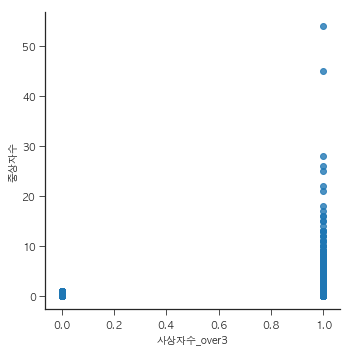

In [942]:
sns.lmplot(data=train, x="사상자수_over3", y="중상자수", fit_reg=False)

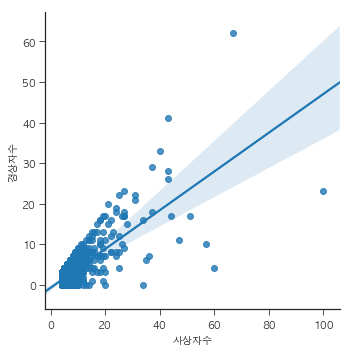

In [943]:
data_over3 = train.loc[train["사상자수"] > 3]
sns.lmplot(data=data_over3, x="사상자수", y="경상자수")

## Classifier

In [944]:
# 주야
# Train
feature_names2 = ["사망자수", "사상자수", "부상신고자수"]
label_name5 = "주야"
X_train = train[feature_names2]
y_train = train[label_name5]
X_test = test[feature_names2]
# Use RandomForest
model = RandomForestClassifier()
# Validation
score = cross_val_score(model, X_train, y_train, cv=20).mean()
# Fit
model.fit(X_train, y_train)
# predict
predictions5 = model.predict(X_test)
print(predictions5.shape)
test["result_주야"] = predictions5
test.head(50)

(50,)


,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,...,sun,차대사람,차대차,차량단독,건널목,result_사망자수,result_부상신고자수,result_중상자수,result_경상자수,result_주야
0,야간,금,1.045853,1.526004,0.000000,0.480150,0.000000,경기,화성시,차대차,...,False,False,True,False,False,1.045853,0.045784,0.554450,0.480150,야간
1,야간,금,1.010186,1.048011,0.000000,0.037825,0.000000,전남,영암군,차대사람,...,False,True,False,False,False,1.010186,0.007843,0.051880,0.037825,야간
2,야간,월,1.000000,1.245791,0.223555,0.000000,0.022236,전남,곡성군,차량단독,...,False,False,False,True,False,1.051007,0.022236,0.223555,0.076199,야간
3,야간,일,2.000000,3.811485,0.738970,1.000000,0.072515,대구,달성군,차대차,...,True,False,True,False,False,1.099972,0.072515,0.738970,0.510270,야간
4,주간,목,1.000000,2.028134,0.489862,0.538272,0.000000,전남,고흥군,차대차,...,False,False,True,False,False,1.064643,0.046978,0.489862,0.538272,야간
5,주간,목,2.000000,3.028134,0.489862,0.538272,0.000000,경북,영천시,차대차,...,False,False,True,False,False,1.064643,0.046978,0.489862,0.538272,야간
6,야간,수,1.000000,2.100560,0.638993,0.461567,0.000000,충남,아산시,차대차,...,False,False,True,False,False,1.070174,0.101757,0.638993,0.461567,야간
7,주간,월,1.045776,6.526983,0.481206,5.000000,0.000000,충남,서천군,차대차,...,False,False,True,False,False,1.045776,0.041139,0.481206,0.485888,주간
8,주간,일,1.094850,26.842280,0.747430,21.000000,4.000000,강원,평창군,차대차,...,True,False,True,False,False,1.094850,0.051454,0.747430,0.834250,주간
9,주간,수,1.006624,1.075933,0.069310,0.000000,0.000000,충북,음성군,차대사람,...,False,True,False,False,False,1.006624,0.005459,0.069310,0.063544,야간


In [945]:
test["correct_주야"] = test["주야"] == test["result_주야"]
test.loc[test["correct_주야"]].shape

(28, 36)

In [946]:
train["onehot_주간"] = train["주야"] == "주간"
train["onehot_야간"] = train["주야"] == "야간"
test.loc[test["주야"].isnull(), "주야"] = test["result_주야"]
test["onehot_주간"] = test["주야"] == "주간"
test["onehot_야간"] = test["주야"] == "야간"

In [947]:
# 요일
# Train
feature_names3 = ["사망자수", "사상자수"]
label_name6 = "요일"
X_train = train[feature_names3]
y_train = train[label_name6]
X_test = test[feature_names3]
# Use RandomForest
model = RandomForestClassifier(max_depth=20 ,random_state=42)
# Validation
score = cross_val_score(model, X_train, y_train, cv=20).mean()
# Fit
model.fit(X_train, y_train)
# predict
predictions6 = model.predict(X_test)
print(predictions6.shape)
test["result_요일"] = predictions6
test.head(50)

(50,)


,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,...,건널목,result_사망자수,result_부상신고자수,result_중상자수,result_경상자수,result_주야,correct_주야,onehot_주간,onehot_야간,result_요일
0,야간,금,1.045853,1.526004,0.000000,0.480150,0.000000,경기,화성시,차대차,...,False,1.045853,0.045784,0.554450,0.480150,야간,True,False,True,금
1,야간,금,1.010186,1.048011,0.000000,0.037825,0.000000,전남,영암군,차대사람,...,False,1.010186,0.007843,0.051880,0.037825,야간,True,False,True,월
2,야간,월,1.000000,1.245791,0.223555,0.000000,0.022236,전남,곡성군,차량단독,...,False,1.051007,0.022236,0.223555,0.076199,야간,True,False,True,월
3,야간,일,2.000000,3.811485,0.738970,1.000000,0.072515,대구,달성군,차대차,...,False,1.099972,0.072515,0.738970,0.510270,야간,True,False,True,일
4,주간,목,1.000000,2.028134,0.489862,0.538272,0.000000,전남,고흥군,차대차,...,False,1.064643,0.046978,0.489862,0.538272,야간,False,True,False,금
5,주간,목,2.000000,3.028134,0.489862,0.538272,0.000000,경북,영천시,차대차,...,False,1.064643,0.046978,0.489862,0.538272,야간,False,True,False,화
6,야간,수,1.000000,2.100560,0.638993,0.461567,0.000000,충남,아산시,차대차,...,False,1.070174,0.101757,0.638993,0.461567,야간,True,False,True,금
7,주간,월,1.045776,6.526983,0.481206,5.000000,0.000000,충남,서천군,차대차,...,False,1.045776,0.041139,0.481206,0.485888,주간,True,True,False,일
8,주간,일,1.094850,26.842280,0.747430,21.000000,4.000000,강원,평창군,차대차,...,False,1.094850,0.051454,0.747430,0.834250,주간,True,True,False,일
9,주간,수,1.006624,1.075933,0.069310,0.000000,0.000000,충북,음성군,차대사람,...,False,1.006624,0.005459,0.069310,0.063544,야간,False,True,False,월


In [948]:
test["correct_요일"] = test["요일"] == test["result_요일"]
test.loc[test["correct_요일"]].shape

(11, 40)

In [949]:
# 발생지시도
# Train
feature_names4 = ["사망자수", "사상자수"]
label_name7 = "발생지시도"
X_train = train[feature_names4]
y_train = train[label_name7]
X_test = test[feature_names4]
# Use RandomForest
model = RandomForestClassifier(max_depth=20 ,random_state=42)
# Validation
score = cross_val_score(model, X_train, y_train, cv=20).mean()
# Fit
model.fit(X_train, y_train)
# predict
predictions7 = model.predict(X_test)
print(predictions7.shape)
test["result_발생지시도"] = predictions7
test.head(50)

(50,)


,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,...,result_부상신고자수,result_중상자수,result_경상자수,result_주야,correct_주야,onehot_주간,onehot_야간,result_요일,correct_요일,result_발생지시도
0,야간,금,1.045853,1.526004,0.000000,0.480150,0.000000,경기,화성시,차대차,...,0.045784,0.554450,0.480150,야간,True,False,True,금,True,경기
1,야간,금,1.010186,1.048011,0.000000,0.037825,0.000000,전남,영암군,차대사람,...,0.007843,0.051880,0.037825,야간,True,False,True,월,False,경기
2,야간,월,1.000000,1.245791,0.223555,0.000000,0.022236,전남,곡성군,차량단독,...,0.022236,0.223555,0.076199,야간,True,False,True,월,True,경기
3,야간,일,2.000000,3.811485,0.738970,1.000000,0.072515,대구,달성군,차대차,...,0.072515,0.738970,0.510270,야간,True,False,True,일,True,경기
4,주간,목,1.000000,2.028134,0.489862,0.538272,0.000000,전남,고흥군,차대차,...,0.046978,0.489862,0.538272,야간,False,True,False,금,False,경기
5,주간,목,2.000000,3.028134,0.489862,0.538272,0.000000,경북,영천시,차대차,...,0.046978,0.489862,0.538272,야간,False,True,False,화,False,경기
6,야간,수,1.000000,2.100560,0.638993,0.461567,0.000000,충남,아산시,차대차,...,0.101757,0.638993,0.461567,야간,True,False,True,금,False,경기
7,주간,월,1.045776,6.526983,0.481206,5.000000,0.000000,충남,서천군,차대차,...,0.041139,0.481206,0.485888,주간,True,True,False,일,False,경기
8,주간,일,1.094850,26.842280,0.747430,21.000000,4.000000,강원,평창군,차대차,...,0.051454,0.747430,0.834250,주간,True,True,False,일,True,전남
9,주간,수,1.006624,1.075933,0.069310,0.000000,0.000000,충북,음성군,차대사람,...,0.005459,0.069310,0.063544,야간,False,True,False,월,False,경기


In [950]:
test["correct_발생지시도"] = test["발생지시도"] == test["result_발생지시도"]
test.loc[test["correct_발생지시도"]].shape

(6, 42)

In [951]:
train.loc[train["발생지시도"] == "경남", "발생지시군구"]

18           고성군
43           밀양시
46           고성군
53           진주시
54           김해시
64           합천군
69           함양군
71           밀양시
74           진주시
95           김해시
96           함안군
109          합천군
113          양산시
175          거창군
186          사천시
198      창원시(통합)
205      창원시(통합)
260          거창군
277          밀양시
278          통영시
284          함안군
295      창원시(통합)
308          양산시
311      창원시(통합)
327          김해시
328          의령군
335          함안군
350      창원시(통합)
361          진주시
374          거제시
          ...   
24671        고성군
24676        하동군
24678        고성군
24718        진주시
24724        거제시
24729        창녕군
24759        거창군
24766        양산시
24775    창원시(통합)
24811    창원시(통합)
24819    창원시(통합)
24820        사천시
24822    창원시(통합)
24829        김해시
24832        거제시
24847    창원시(통합)
24854        거제시
24876    창원시(통합)
24877        진주시
24899        밀양시
24905        진주시
24907        통영시
24942    창원시(통합)
24945        진주시
24956        의령군
24971        진주시
24977        고성군
24990        김

In [952]:
test

,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,...,result_중상자수,result_경상자수,result_주야,correct_주야,onehot_주간,onehot_야간,result_요일,correct_요일,result_발생지시도,correct_발생지시도
0,야간,금,1.045853,1.526004,0.000000,0.480150,0.000000,경기,화성시,차대차,...,0.554450,0.480150,야간,True,False,True,금,True,경기,True
1,야간,금,1.010186,1.048011,0.000000,0.037825,0.000000,전남,영암군,차대사람,...,0.051880,0.037825,야간,True,False,True,월,False,경기,False
2,야간,월,1.000000,1.245791,0.223555,0.000000,0.022236,전남,곡성군,차량단독,...,0.223555,0.076199,야간,True,False,True,월,True,경기,False
3,야간,일,2.000000,3.811485,0.738970,1.000000,0.072515,대구,달성군,차대차,...,0.738970,0.510270,야간,True,False,True,일,True,경기,False
4,주간,목,1.000000,2.028134,0.489862,0.538272,0.000000,전남,고흥군,차대차,...,0.489862,0.538272,야간,False,True,False,금,False,경기,False
5,주간,목,2.000000,3.028134,0.489862,0.538272,0.000000,경북,영천시,차대차,...,0.489862,0.538272,야간,False,True,False,화,False,경기,False
6,야간,수,1.000000,2.100560,0.638993,0.461567,0.000000,충남,아산시,차대차,...,0.638993,0.461567,야간,True,False,True,금,False,경기,False
7,주간,월,1.045776,6.526983,0.481206,5.000000,0.000000,충남,서천군,차대차,...,0.481206,0.485888,주간,True,True,False,일,False,경기,False
8,주간,일,1.094850,26.842280,0.747430,21.000000,4.000000,강원,평창군,차대차,...,0.747430,0.834250,주간,True,True,False,일,True,전남,False
9,주간,수,1.006624,1.075933,0.069310,0.000000,0.000000,충북,음성군,차대사람,...,0.069310,0.063544,야간,False,True,False,월,False,경기,False


In [953]:
real = pd.read_csv("./123.csv")
real

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,check
0,2017,2017122920,40,야간,금,1,2,0,1,0,...,기타단일로,승용차,승용차,승합차,승합차,964958,1907030,127.105329,37.161354,1
1,2017,2017122900,43,야간,금,1,2,0,1,0,...,기타단일로,승용차,승용차,보행자,보행자,896890,1639952,126.373505,34.748824,2
2,2017,2017122505,30,야간,월,1,1,0,0,0,...,기타단일로,자전거,자전거,없음,없음,981873,1700087,127.300715,35.295270,3
3,2017,2017122422,35,야간,일,2,3,0,1,0,...,기타단일로,승용차,승용차,승합차,승합차,1085461,1748122,128.444947,35.725702,4
4,2017,2017122109,50,주간,목,1,3,1,1,0,...,기타단일로,화물차,화물차,화물차,화물차,971498,1624787,127.189098,34.616882,5
5,2017,2017122106,40,주간,목,2,3,1,0,0,...,기타단일로,화물차,화물차,화물차,화물차,1135611,1770957,129.003196,35.925885,6
6,2017,2017121301,7,야간,수,1,2,0,1,0,...,기타단일로,승합차,승합차,화물차,화물차,955878,1880469,127.004624,36.921548,7
7,2017,2017121114,0,주간,월,1,11,5,5,0,...,기타단일로,승용차,승용차,특수차,특수차,919486,1796592,126.604831,36.163073,8
8,2017,2017121017,35,주간,일,1,29,3,21,4,...,기타단일로,건설기계,건설기계,승합차,승합차,1109582,1963400,128.729463,37.669131,9
9,2017,2017120614,14,주간,수,1,1,0,0,0,...,교차로내,승용차,승용차,보행자,보행자,1004768,1886822,127.553573,36.979837,10


In [954]:
realtest = pd.read_csv("./test_kor.csv")
realtest

,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류
0,야간,금,NaN,NaN,0.0,NaN,0.0,경기,화성시,차대차,측면충돌,중앙선 침범,단일로,기타단일로,승용차,승합차
1,야간,금,NaN,NaN,0.0,NaN,0.0,전남,영암군,차대사람,차도통행중,과속,단일로,기타단일로,승용차,보행자
2,야간,월,1.0,NaN,NaN,0.0,NaN,전남,곡성군,차량단독,전도전복,안전운전 의무 불이행,단일로,기타단일로,자전거,없음
3,야간,일,2.0,NaN,NaN,1.0,NaN,대구,달성군,차대차,측면충돌,중앙선 침범,단일로,기타단일로,승용차,승합차
4,주간,목,1.0,NaN,NaN,NaN,0.0,전남,고흥군,차대차,정면충돌,중앙선 침범,단일로,기타단일로,화물차,화물차
5,주간,목,2.0,NaN,NaN,NaN,0.0,경북,영천시,차대차,추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차
6,야간,수,1.0,NaN,NaN,NaN,0.0,충남,아산시,차대차,추돌,안전거리 미확보,단일로,기타단일로,승합차,화물차
7,주간,월,NaN,NaN,NaN,5.0,0.0,충남,서천군,차대차,추돌,안전운전 의무 불이행,단일로,기타단일로,승용차,특수차
8,주간,일,NaN,NaN,NaN,21.0,4.0,강원,평창군,차대차,측면충돌,기타(운전자법규위반),단일로,기타단일로,건설기계,승합차
9,주간,수,NaN,NaN,NaN,0.0,0.0,충북,음성군,차대사람,횡단중,과속,교차로,교차로내,승용차,보행자


In [955]:
# 도로형태_대분류, 도로형태
# preprocess
train["도로형태_대분류_교차로"] = train["도로형태_대분류"] == "교차로"
train["도로형태_대분류_단일로"] = train["도로형태_대분류"] == "단일로"
test["도로형태_대분류_교차로"] = test["도로형태_대분류"] == "교차로"
test["도로형태_대분류_단일로"] = test["도로형태_대분류"] == "단일로"

train["도로형태_교차로내"] = train["도로형태"] == "교차로내"
train["도로형태_교차로부근"] = train["도로형태"] == "교차로부근"
train["도로형태_기타단일로"] = train["도로형태"] == "기타단일로"
train["도로형태_횡단보도상"] = train["도로형태"] == "횡단보도상"
test["도로형태_교차로내"] = test["도로형태"] == "교차로내"
test["도로형태_교차로부근"] = test["도로형태"] == "교차로부근"
test["도로형태_기타단일로"] = test["도로형태"] == "기타단일로"
test["도로형태_횡단보도상"] = test["도로형태"] == "횡단보도상"

# 도로형태_대분류
# Train
feature_names5 = ["도로형태_교차로내", "도로형태_교차로부근", "도로형태_기타단일로", "도로형태_횡단보도상"]
label_name8 = "도로형태_대분류"
X_train = train[feature_names5]
y_train = train[label_name8]
X_test = test[feature_names5]
# Use RandomForest
model = RandomForestClassifier(max_depth=20 ,random_state=42)
# Validation
score = cross_val_score(model, X_train, y_train, cv=20).mean()
# Fit
model.fit(X_train, y_train)
# predict
predictions8 = model.predict(X_test)
print(predictions8.shape)
test["result_도로형태_대분류"] = predictions8

# 도로형태
# Train
feature_names6 = ["도로형태_대분류_교차로", "도로형태_대분류_단일로"]
label_name9 = "도로형태"
X_train = train[feature_names6]
y_train = train[label_name9]
X_test = test[feature_names6]
# Use RandomForest
model = RandomForestClassifier(max_depth=20 ,random_state=42)
# Validation
score = cross_val_score(model, X_train, y_train, cv=20).mean()
# Fit
model.fit(X_train, y_train)
# predict
predictions9 = model.predict(X_test)
print(predictions9.shape)
test["result_도로형태"] = predictions9
test.head(50)

/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


(50,)


/Users/PJS/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


(50,)


,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,...,result_발생지시도,correct_발생지시도,도로형태_대분류_교차로,도로형태_대분류_단일로,도로형태_교차로내,도로형태_교차로부근,도로형태_기타단일로,도로형태_횡단보도상,result_도로형태_대분류,result_도로형태
0,야간,금,1.045853,1.526004,0.000000,0.480150,0.000000,경기,화성시,차대차,...,경기,True,False,True,False,False,True,False,단일로,기타단일로
1,야간,금,1.010186,1.048011,0.000000,0.037825,0.000000,전남,영암군,차대사람,...,경기,False,False,True,False,False,True,False,단일로,기타단일로
2,야간,월,1.000000,1.245791,0.223555,0.000000,0.022236,전남,곡성군,차량단독,...,경기,False,False,True,False,False,True,False,단일로,기타단일로
3,야간,일,2.000000,3.811485,0.738970,1.000000,0.072515,대구,달성군,차대차,...,경기,False,False,True,False,False,True,False,단일로,기타단일로
4,주간,목,1.000000,2.028134,0.489862,0.538272,0.000000,전남,고흥군,차대차,...,경기,False,False,True,False,False,True,False,단일로,기타단일로
5,주간,목,2.000000,3.028134,0.489862,0.538272,0.000000,경북,영천시,차대차,...,경기,False,False,True,False,False,True,False,단일로,기타단일로
6,야간,수,1.000000,2.100560,0.638993,0.461567,0.000000,충남,아산시,차대차,...,경기,False,False,True,False,False,True,False,단일로,기타단일로
7,주간,월,1.045776,6.526983,0.481206,5.000000,0.000000,충남,서천군,차대차,...,경기,False,False,True,False,False,True,False,단일로,기타단일로
8,주간,일,1.094850,26.842280,0.747430,21.000000,4.000000,강원,평창군,차대차,...,전남,False,False,True,False,False,True,False,단일로,기타단일로
9,주간,수,1.006624,1.075933,0.069310,0.000000,0.000000,충북,음성군,차대사람,...,경기,False,True,False,True,False,False,False,교차로,교차로내


In [956]:
test.loc[(test["도로형태_대분류"].isnull()) & (test["도로형태"].notnull()), "도로형태_대분류"] = test["result_도로형태_대분류"]
test.loc[(test["도로형태_대분류"].notnull()) & (test["도로형태"].isnull()), "도로형태"] = test["result_도로형태"]
test[["도로형태_대분류", "도로형태"]]

,도로형태_대분류,도로형태
0,단일로,기타단일로
1,단일로,기타단일로
2,단일로,기타단일로
3,단일로,기타단일로
4,단일로,기타단일로
5,단일로,기타단일로
6,단일로,기타단일로
7,단일로,기타단일로
8,단일로,기타단일로
9,교차로,교차로내


In [957]:
realtest

,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류
0,야간,금,NaN,NaN,0.0,NaN,0.0,경기,화성시,차대차,측면충돌,중앙선 침범,단일로,기타단일로,승용차,승합차
1,야간,금,NaN,NaN,0.0,NaN,0.0,전남,영암군,차대사람,차도통행중,과속,단일로,기타단일로,승용차,보행자
2,야간,월,1.0,NaN,NaN,0.0,NaN,전남,곡성군,차량단독,전도전복,안전운전 의무 불이행,단일로,기타단일로,자전거,없음
3,야간,일,2.0,NaN,NaN,1.0,NaN,대구,달성군,차대차,측면충돌,중앙선 침범,단일로,기타단일로,승용차,승합차
4,주간,목,1.0,NaN,NaN,NaN,0.0,전남,고흥군,차대차,정면충돌,중앙선 침범,단일로,기타단일로,화물차,화물차
5,주간,목,2.0,NaN,NaN,NaN,0.0,경북,영천시,차대차,추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차
6,야간,수,1.0,NaN,NaN,NaN,0.0,충남,아산시,차대차,추돌,안전거리 미확보,단일로,기타단일로,승합차,화물차
7,주간,월,NaN,NaN,NaN,5.0,0.0,충남,서천군,차대차,추돌,안전운전 의무 불이행,단일로,기타단일로,승용차,특수차
8,주간,일,NaN,NaN,NaN,21.0,4.0,강원,평창군,차대차,측면충돌,기타(운전자법규위반),단일로,기타단일로,건설기계,승합차
9,주간,수,NaN,NaN,NaN,0.0,0.0,충북,음성군,차대사람,횡단중,과속,교차로,교차로내,승용차,보행자


In [958]:
train.loc[train["당사자종별_1당_대분류"] == "보행자"]

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,건널목,사상자수_over3,onehot_주간,onehot_야간,도로형태_대분류_교차로,도로형태_대분류_단일로,도로형태_교차로내,도로형태_교차로부근,도로형태_기타단일로,도로형태_횡단보도상


In [960]:
real["발생지시도"]

0     경기
1     전남
2     전남
3     대구
4     전남
5     경북
6     충남
7     충남
8     강원
9     충북
10    경남
11    대전
12    대구
13    울산
14    경기
15    전북
16    경남
17    충남
18    충남
19    전남
20    경기
21    경기
22    전남
23    경기
24    충남
25    전북
26    경남
27    서울
28    경기
29    충남
30    인천
31    전북
32    대구
33    광주
34    서울
35    대구
36    강원
37    서울
38    경남
39    전북
40    서울
41    경기
42    경기
43    대전
44    충남
45    전북
46    서울
47    서울
48    서울
49    경북
Name: 발생지시도, dtype: object